# Logistic Regression

We consider a binary classification problem, where the dataset contains pairs of the form $(x, y)$, where $x$ is a 2D-point and $y \in \{-1, +1\}$ is the binary label.

Samples with positive labels are generated according to a normal distribution $\mathcal{N}(\mu_+, \sigma^2 I)$, with unknown mean $\mu_+$ and covariance $\sigma^2 I$. Samples with negative labels are generated according to a normal distribution $\mathcal{N}(\mu_-, \sigma^2 I)$, with unknown mean $\mu_-$ and same covariance $\sigma^2 I$.

Our goal is to fit a Logistic model to the observations by using the Gradient Descent procedure.

## Dataset generation
We start by creating the dataset we will be using for the optimization process. 

In [1]:
import numpy as np


n = 300 # Number of samples for each class
d = 2   # Dimension

mu_pos = 1. * np.ones(d)
mu_neg = -1. * np.ones(d)
sigma = 1.

X_pos = mu_pos + sigma * np.random.randn(n, d)
y_pos = np.ones(n)
X_neg = mu_neg + sigma * np.random.randn(n, d)
y_neg = -np.ones(n)

X = np.vstack((X_pos, X_neg))
y = np.hstack((y_pos, y_neg))
# ones = np.ones((y.size,1))
# X = np.hstack((ones,X))

Let us visualize the generated points.

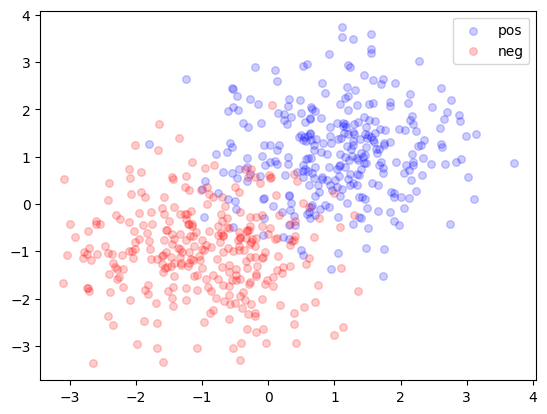

In [2]:
import matplotlib.pyplot as plt

plt.scatter(X_pos[:, 0], X_pos[:, 1], s=30, color='b', label='pos', alpha=.2)
plt.scatter(X_neg[:, 0], X_neg[:, 1], s=30, color='r', label='neg', alpha=.2)
plt.legend()
plt.show()

### Question 1
Our goal is to learn the posterior probability $\mathbb{P}(Y=+1 | X=x)$ with the following parametric model:
$$
  \mathbb{P}(Y=+1 | X=x) = \frac{\exp(w^\top x)}{1 + \exp(w^\top x)} \enspace.
$$
We use the negative log-likelihood as the loss function. Write the expression of the loss $\mathcal{L}(w)$.

$$
\mathcal{L}(w)=-\sum_{i=1}^{N} \log \sigma(y_i w^T x_i) = -\sum_{i=1}^{N} \log \left( \frac{1}{1 + e^{-y_i w^T x_i}} \right) 
$$

### Question 2
Define a function `logistic_loss(w, X, y)` computing the loss $\mathcal{L}(w)$ defined above on the dataset `(X, y)`.

In [3]:
sigmoid = lambda x: 1 / (1 + np.exp(np.clip(-x, -500, 500))) 
def logistic_loss(w, X, y):
    return -np.sum(np.log(sigmoid(y * (X@w))))/y.size

## Gradient Descent
A popular optimization method to find a good estimate of the parameter $w^\star$ is the gradient descent. The overall idea is to start from some initial guess $w_0$, compute the gradient of the loss $\nabla \mathcal{L}$ at $w_0$ and update the parameter in the opposite direction
$$
w_1 = w_0 - \gamma \nabla\mathcal{L}(w_0) \enspace,
$$
where $\gamma > 0$ is an hyperparameter called step size. Then, the updating process is repeated for a set amount of iterations.

### Question 3
What is the gradient of $\mathcal{L}(w)$? Implement a function `gradient(w, X, y)` that returns $\nabla \mathcal{L}(w)$.

In [4]:
def gradient(w, X, y):
    grad = np.zeros(w.shape)
    for i in range(y.size):
        xi = X[i] 
        yi = y[i]
        grad += xi  * yi * sigmoid(-yi * np.dot(w, xi))
    return -grad/y.size

The gradient descent procedure is partially defined in the function `gradient_descent(w0, step_size=1e-2, n_iter=100)` below. Complete it and test your `gradient` implementation with it.

In [5]:
def gradient_descent(w0, step_size, n_iter,X,y):
    w = w0.copy()
    loss_evolution = []
    for _ in range(n_iter):
        w = w-step_size*gradient(w,X,y)     
        loss_evolution.append(logistic_loss(w, X, y))
    return w, loss_evolution

The following script runs the gradient descent procedure and plot the decision boundary.

In [6]:
def plotter(algo=gradient_descent,step=1e-2,iterations=100):
    w0 = np.array([-1., 1.])
    est_w, loss_values = algo(w0,step,iterations,X,y)
    
    fig, axs = plt.subplots(1, 2, figsize=(8, 4), layout='tight')
    # Data points
    axs[0].scatter(X_pos[:, 0], X_pos[:, 1], s=30, color='b', label='pos', alpha=.2)
    axs[0].scatter(X_neg[:, 0], X_neg[:, 1], s=30, color='r', label='neg', alpha=.2)
    
    # Boundary
    axis_xlim = axs[0].get_xlim()
    axis_ylim = axs[0].get_ylim()
    axs[0].plot(axis_xlim, -np.array(axis_xlim) * est_w[0] / est_w[1],
                linewidth=2, linestyle='--', color='k')
    # axs[0].plot(axis_xlim, -np.array(axis_xlim) * est_w[1] / est_w[2] - est_w[0] / est_w[2],
    #             linewidth=2, linestyle='--', color='k')
    axs[0].set_xlim(axis_xlim)
    axs[0].set_ylim(axis_ylim)
    
    axs[0].legend()
    axs[0].set_title('Decision boundary')
    
    # Loss
    axs[1].plot(loss_values, linewidth=3, color='b', marker='o',
                markevery=100, label='Negative log-likelihood')
    # axs[1].set_ylim([0, 1.])
    axs[1].set_xlabel('Iterations')
    axs[1].legend()
    axs[1].set_title('Gradient Descent')
    plt.show()

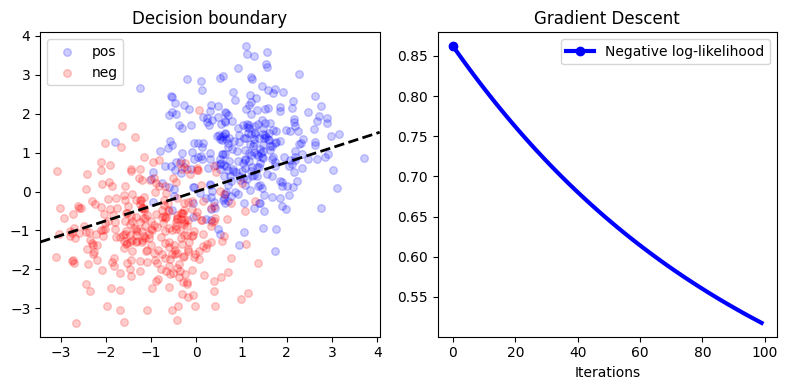

In [7]:
plotter()

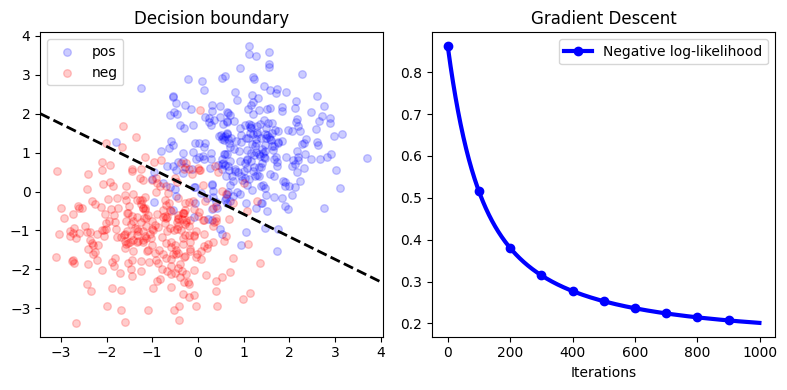

In [8]:
plotter(iterations=1000)


### Question 4
Try the above procedure for different values of the `step_size`. What do you notice? Same question for $\sigma^2$.

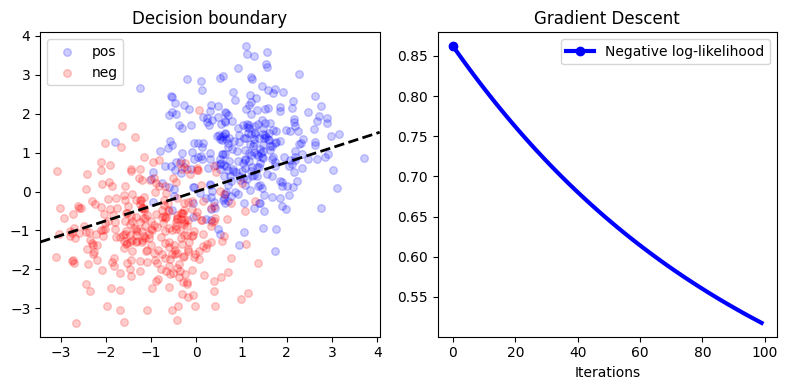

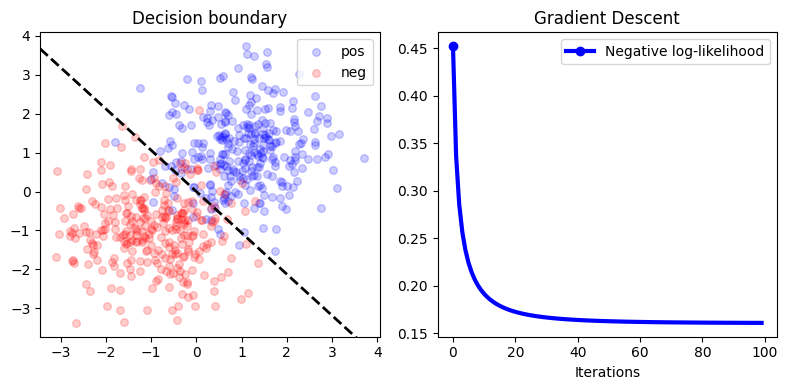

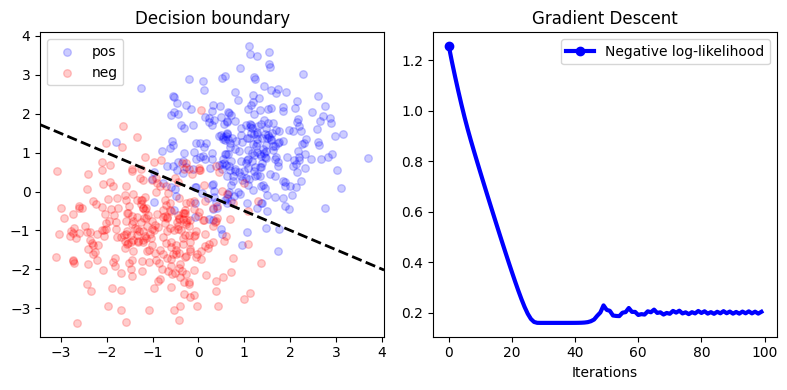

In [9]:
#Varying Step size
step_val=[1e-2,1,60]
for i in step_val:
    plotter(step=i)

With step size too small, it takes a lot of iterations to minimize the loss function.</br>
With a good step size, we can notice that we ccould have minimized the loss quite a lot in a few iterations.</br>
With a very large step size, the negtive log-likelihood oscillate around the global minimum point.

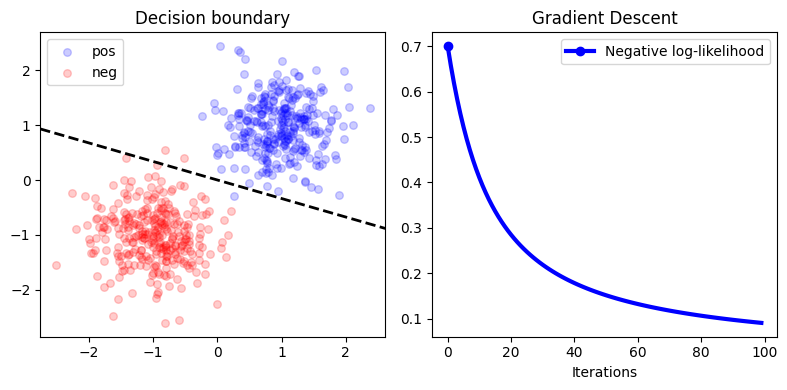

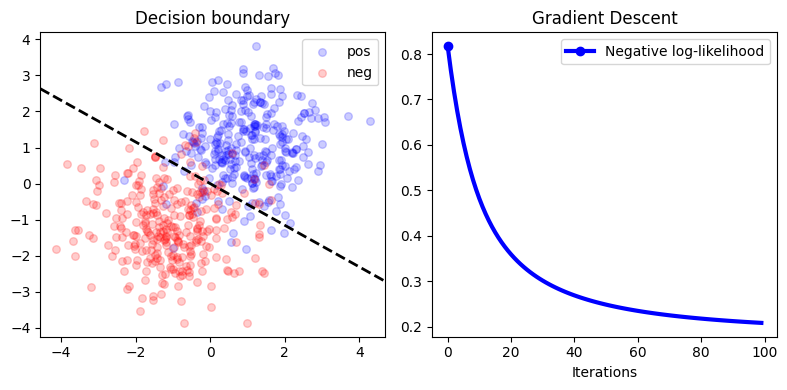

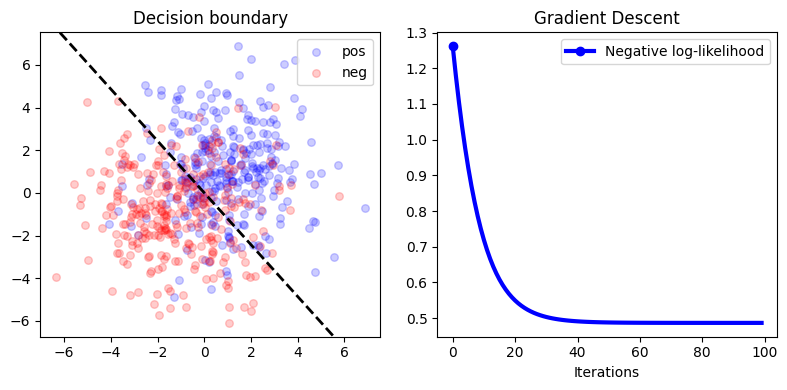

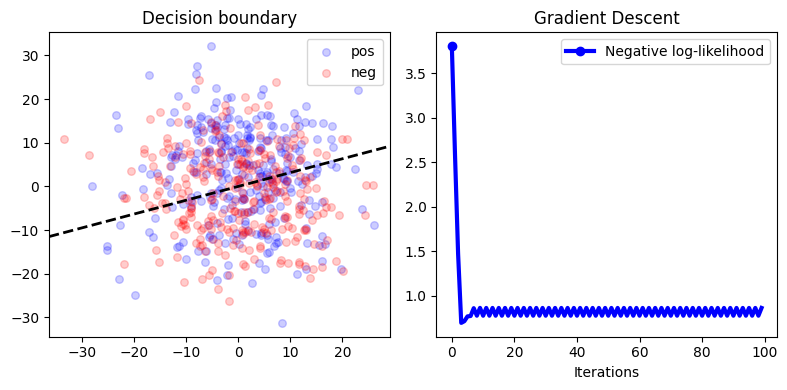

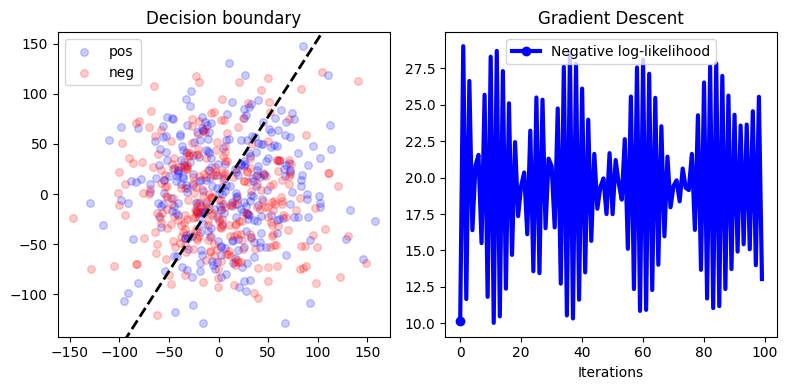

In [10]:
#Varying the variance
var=[0.5,1,2,10,50]
for k in var:
    X_pos_1 = mu_pos + k * sigma * np.random.randn(n, d)
    y_pos_1 = np.ones(n)
    X_neg_1 = mu_neg + k * sigma * np.random.randn(n, d)
    y_neg_1 = -np.ones(n)

    X1 = np.vstack((X_pos_1, X_neg_1))
    y1 = np.hstack((y_pos_1, y_neg))    

    w0 = np.array([-1., 1.])
    est_w, loss_values = gradient_descent(w0,1e-1,100,X1,y1)
    
    fig, axs = plt.subplots(1, 2, figsize=(8, 4), layout='tight')
    # Data points
    axs[0].scatter(X_pos_1[:, 0], X_pos_1[:, 1], s=30, color='b', label='pos', alpha=.2)
    axs[0].scatter(X_neg_1[:, 0], X_neg_1[:, 1], s=30, color='r', label='neg', alpha=.2)
    
    # Boundary
    axis_xlim = axs[0].get_xlim()
    axis_ylim = axs[0].get_ylim()
    axs[0].plot(axis_xlim, -np.array(axis_xlim) * est_w[0] / est_w[1],
                linewidth=2, linestyle='--', color='k')
    # axs[0].plot(axis_xlim, -np.array(axis_xlim) * est_w[1] / est_w[2] - est_w[0] / est_w[2],
    #             linewidth=2, linestyle='--', color='k')
    axs[0].set_xlim(axis_xlim)
    axs[0].set_ylim(axis_ylim)
    
    axs[0].legend()
    axs[0].set_title('Decision boundary')
    
    # Loss
    axs[1].plot(loss_values, linewidth=3, color='b', marker='o',
                markevery=100, label='Negative log-likelihood')
    # axs[1].set_ylim([0, 1.])
    axs[1].set_xlabel('Iterations')
    axs[1].legend()
    axs[1].set_title('Gradient Descent')
    plt.show()


## Stochastic Gradient Descent
Remember that the loss $\mathcal{L}$ can be written as
$$
\mathcal{L}(w) = \frac{1}{n} \sum_{i = 1}^n \ell(w; \mathbf{x}_i, y_i) \enspace,
$$
where $\ell(w; \mathbf{x}, y)$ is the negative log-likelihood associated to the sample $(\mathbf{x}_i, y_i)$.

To compute the full gradient, one has to sum $n$ partial gradients $\nabla \ell(w; \mathbf{x}_i, y_i)$. In many machine learning settings, the number of observations $n$ is much larger than a few hundreds, and computing the gradient becomes the bottleneck of the optimization process.

Stochastic Gradient Descent sacrifices accuracy in favor of a much quicker gradient computation. One way to implement it is to select uniformly at random a pair $(\mathbf{x}_i, y_i)$, compute the incomplete gradient $\nabla \ell(w; \mathbf{x}_i, y_i)$ associated to the pair and update the estimate $w$ as if it were the complete gradient. Then, at the following iteration, a pair is randomly drawn again and the estimate is again updated accordingly, _etc_.

### Bonus
Complete the SGD implementation below and compare it to the gradient descent algorithm.

In [11]:
def stochastic_gradient_descent(w0,step_size, n_iter,X,y):
    w = w0.copy()
    loss_evolution=[]
    for i in range(n_iter):
        # Select a random index
        rnd_idx = np.random.randint(X.shape[0])
        # TODO: Update w
        w = w - step_size * gradient(w, X[rnd_idx][None, :], np.array([y[rnd_idx]]))
        loss_evolution.append(logistic_loss(w, X, y))
    return w,loss_evolution

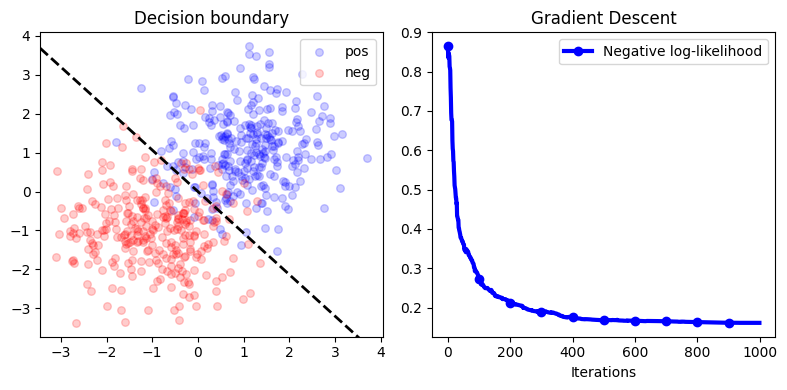

In [12]:
plotter(algo=stochastic_gradient_descent,iterations=1000,step=5e-2)

SGD can be further improved by selecting a mini-batch of samples instead of a unique pair. Modify the previous implementation so that it selects several indices at each iteration.

In [13]:
def batch_stochastic_gradient_descent(w0,step_size, n_iter,X,y):
    w = w0.copy()
    loss_evolution=[]
    for i in range(n_iter):
        rnd_idx = np.random.randint(0,X.shape[0],10) #batch of 10 in each iterations
        w = w - step_size * gradient(w, X[rnd_idx], y[rnd_idx])
        loss_evolution.append(logistic_loss(w, X, y))
    return w,loss_evolution

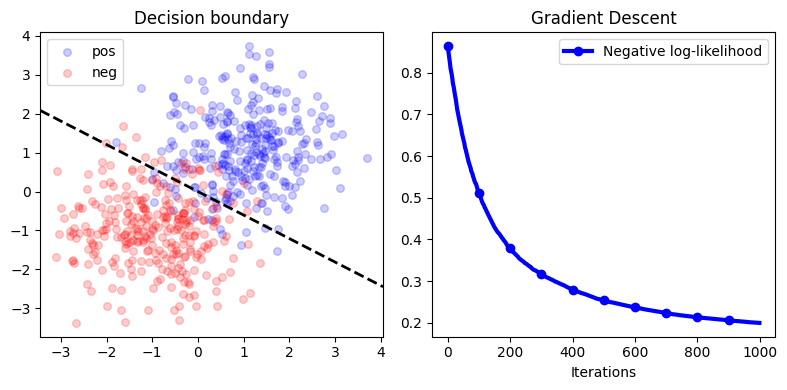

In [14]:
plotter(algo=batch_stochastic_gradient_descent,iterations=1000)